In [161]:
import os
from glob import glob
import pandas as pd
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from IPython.display import Audio
from sklearn.decomposition import PCA

from dtaidistance import dtw

from helpers import *

In [162]:
WINDOW = ("hann")
NPERSEG = 120
NBINS = 61 # number of total frequency bins

YEAR = 2015

data_dir = "/Volumes/My Passport/Song sparrow songs analysis/Song analysis - Jiayi/Named/Songtypes_2015/*/"

bird_dirs = glob(f"{data_dir}")
n_birds = len(bird_dirs)

In [163]:
filt_centers = [10, 12, 15, 18]
filts = []
for center in filt_centers:
    filts.append(generate_exp_win(center, NBINS))

In [164]:
df[df["filename"] == "owym_20150501_1006_031_MA_Backgroundnoise_477e.wav"]

,ind,songtype,year,month,date,filename,npos_x,npos_y,songtype_c,songtype_v,pos_x,pos_y
563,owym,477e,2015,5,1,owym_20150501_1006_031_MA_Backgroundnoise_477e...,-0.009364,-0.099574,477,e,-0.096584,-1.00622


Text(0, 0.5, 'Magnitude')

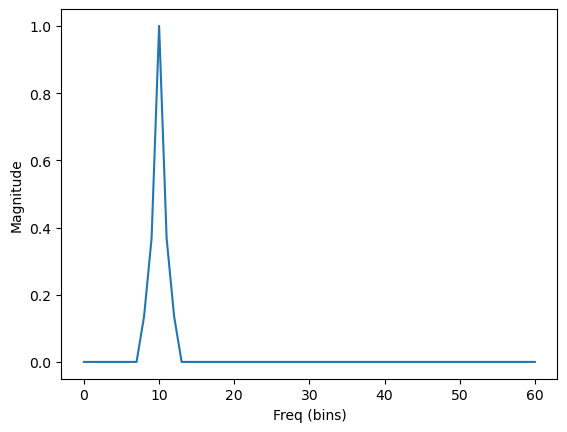

In [165]:
plt.plot(filts[0])
plt.xlabel("Freq (bins)")
plt.ylabel("Magnitude")

In [166]:
def apply_filt(sxx, filt):
    return filt @ sxx

def generate_feature_vector(sxx, filts):
    feature_vec = []
    for f in filts:
        feature_vec.append(apply_filt(sxx, f))
    return np.array(feature_vec)

processing 1/11 bird...
/Volumes/My Passport/Song sparrow songs analysis/Song analysis - Jiayi/Named/Songtypes_2015/bbom2015/ ['/Volumes/My Passport/Song sparrow songs analysis/Song analysis - Jiayi/Named/Songtypes_2015/bbom2015/bbom_20150324_0844_002_PN_400a.wav', '/Volumes/My Passport/Song sparrow songs analysis/Song analysis - Jiayi/Named/Songtypes_2015/bbom2015/bbom_20150324_0844_002_PN_400b.wav', '/Volumes/My Passport/Song sparrow songs analysis/Song analysis - Jiayi/Named/Songtypes_2015/bbom2015/bbom_20150324_0847_005_PN_401a.wav', '/Volumes/My Passport/Song sparrow songs analysis/Song analysis - Jiayi/Named/Songtypes_2015/bbom2015/bbom_20150324_0847_005_PN_401b.wav', '/Volumes/My Passport/Song sparrow songs analysis/Song analysis - Jiayi/Named/Songtypes_2015/bbom2015/bbom_20150324_0847_005_PN_401c.wav', '/Volumes/My Passport/Song sparrow songs analysis/Song analysis - Jiayi/Named/Songtypes_2015/bbom2015/bbom_20150324_0847_005_PN_401d.wav', '/Volumes/My Passport/Song sparrow song

AssertionError: 

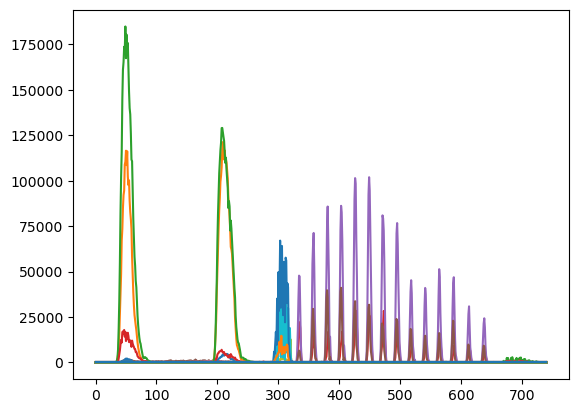

In [169]:
for i, b in enumerate(bird_dirs):
    print(f"processing {i+1}/{len(bird_dirs)} bird...")
    wav_paths = glob(b+"*.wav")
    print(b, wav_paths)
    for wav_path in [wav_paths[0]]:
        filename = wav_path.split("/")[-1]
        ind, year, month, day = parse_filename(filename)
        songtype = parse_songtype(filename)

        sr, seg = wavfile.read(wav_path)
        f, t, sxx = spectrogram(seg, fs=sr, window=WINDOW, nperseg=NPERSEG)
        for i in range(len(f)):
            plt.plot(sxx[i])
        
        assert(0)


In [168]:
labels = []
features_vecs = []

for i, b in enumerate(bird_dirs):
    print(f"processing {i+1}/{len(bird_dirs)} bird...")
    wav_paths = glob(b+"*.wav")
    for wav_path in wav_paths:
        filename = wav_path.split("/")[-1]
        ind, year, month, day = parse_filename(filename)
        songtype = parse_songtype(filename)
        labels.append([ind, songtype, year, month, day, filename])

        sr, seg = wavfile.read(wav_path)
        f, t, sxx = spectrogram(seg, fs=sr, window=WINDOW, nperseg=NPERSEG)

        features_vec = generate_feature_vector(sxx, filts)
        features_vecs.append(features_vec)



processing 1/11 bird...
processing 2/11 bird...
processing 3/11 bird...
processing 4/11 bird...
processing 5/11 bird...
processing 6/11 bird...
processing 7/11 bird...
processing 8/11 bird...
processing 9/11 bird...
processing 10/11 bird...
processing 11/11 bird...


['bbom', '400a', 2015, 3, 24, 'bbom_20150324_0844_002_PN_400a.wav']
['bbom', '400b', 2015, 3, 24, 'bbom_20150324_0844_002_PN_400b.wav']
['bbom', '401a', 2015, 3, 24, 'bbom_20150324_0847_005_PN_401a.wav']
['bbom', '401b', 2015, 3, 24, 'bbom_20150324_0847_005_PN_401b.wav']
['bbom', '401c', 2015, 3, 24, 'bbom_20150324_0847_005_PN_401c.wav']


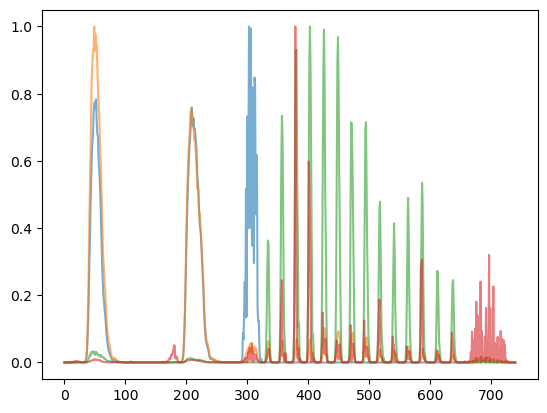

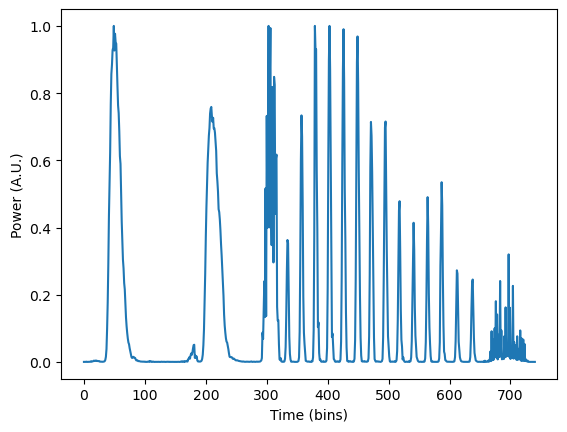

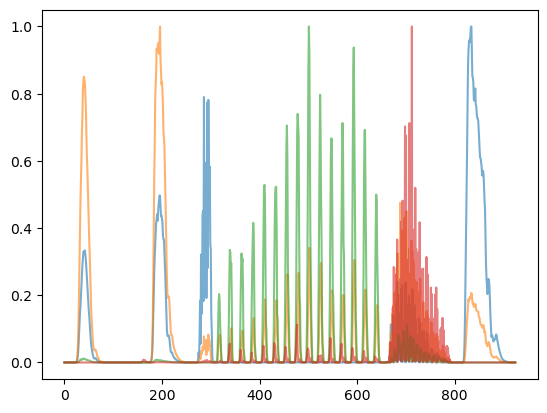

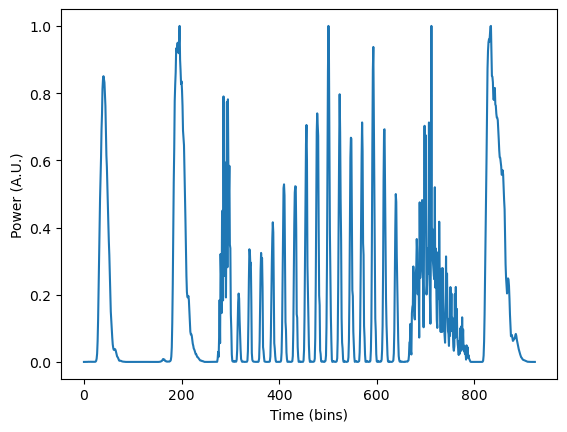

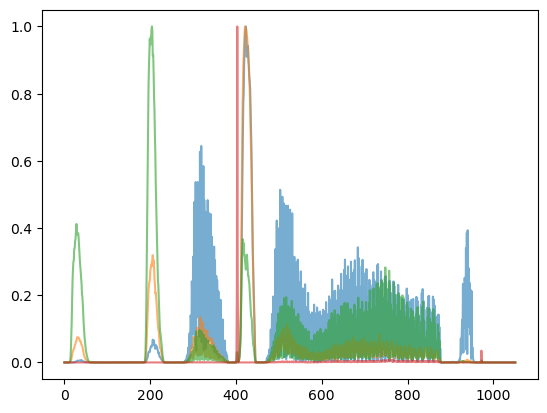

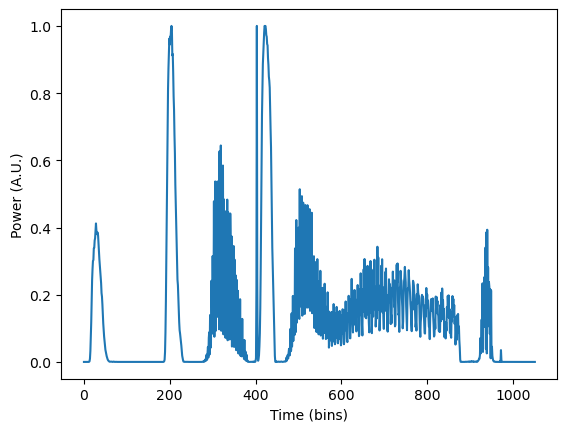

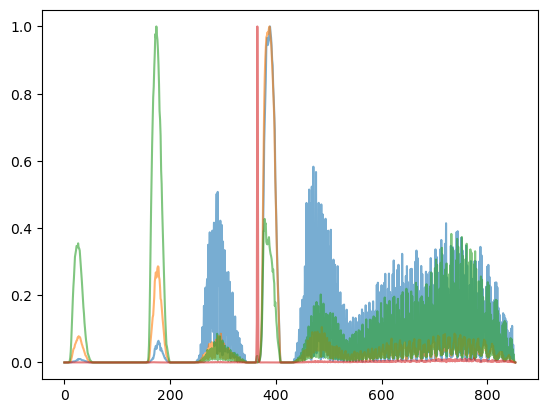

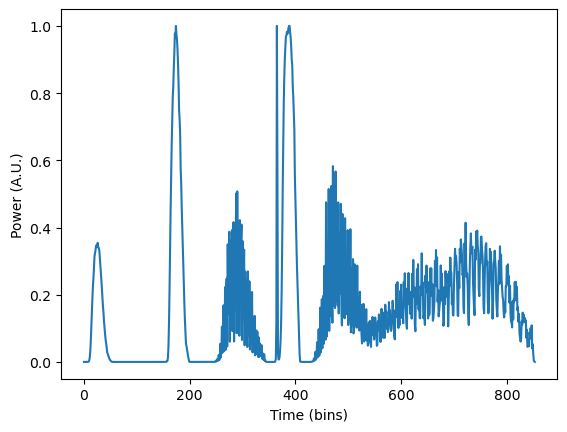

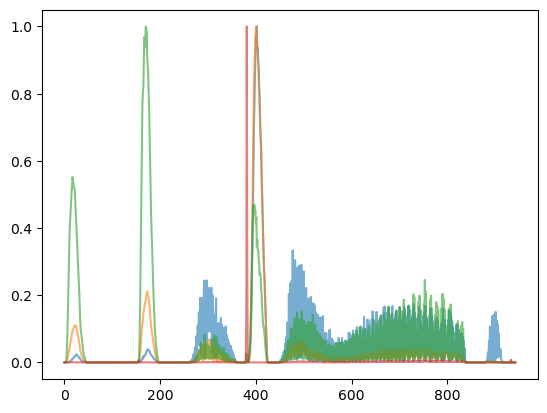

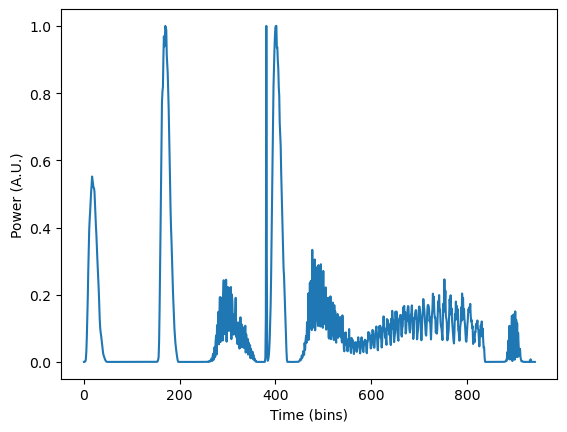

In [ ]:
activites = []
for i, features_vec in enumerate(features_vecs[:5]):
    plt.figure()
    print(labels[i])
    new_feature_vec = []
    for j in range(features_vec.T.shape[1]):
        plt.plot(normalize(features_vec.T[:,j]), alpha=0.6)
        new_feature_vec.append(normalize(features_vec.T[:,j]))
    plt.figure()
    act = np.max(new_feature_vec, axis=0)
    plt.plot(act)
    activites.append(act)
    plt.xlabel("Time (bins)")
    plt.ylabel("Power (A.U.)")

In [ ]:
# import pywt
# import numpy as np
# import matplotlib.pyplot as plt

# # Assume `time_series` is your data and `fs` is the sampling frequency
# fs = 1
# time_series = activites[0]
# scales = np.arange(5, 200)
# coefficients, frequencies = pywt.cwt(time_series, scales, 'cmor')

# # Plot the time-frequency representation
# plt.imshow(np.abs(coefficients), extent=[0, len(time_series)/fs, frequencies[-1], frequencies[0]],
#            cmap='PRGn', aspect='auto', vmax=abs(coefficients).max(), vmin=-abs(coefficients).max())
# plt.title('Wavelet Transform (CWT)')
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.colorbar(label='Magnitude')
# plt.show()

In [ ]:
# # np.argmax(coefficients, axis=1)
# f, ax = plt.subplots(2, 1, figsize=(10, 15))
# ax[0].plot(time_series)
# print(np.argmax(np.abs(coefficients), axis=0).shape)
# ax[1].plot(np.argmax(coefficients, axis=0))
# print(np.argmax(coefficients, axis=0))

# max_coeffs0 = [np.argmax(coefficients, axis=0)]

In [ ]:
# f, t, sxx = spectrogram(activites[0], nperseg=20)

In [ ]:
# print(f)
# print(t.shape)
# # plt.imshow(sxx)
# i = 1

# for i in range(len(f)):
#     plt.plot(sxx[i, :])

In [ ]:
# path = dtw.warping_path_fast(activites[1], activites[0], window=0)
# # new_s = dtw.warp(activites[0], activites[1], path=path)

# # dtw.warping_amount(path)

In [ ]:
# s0 = activites[0]
# s1 = activites[4]

In [ ]:
# from dtaidistance import dtw_visualisation
# # dtw_visualisation.plot_warp(activites[0], activites[1], new_s, path)

# from dtaidistance.subsequence.dtw import subsequence_alignment
# from dtaidistance import dtw_visualisation as dtwvis
# query = s0
# series = s1


# sa = subsequence_alignment(query, series)
# match = sa.best_match()
# startidx, endidx = match.segment
# dtwvis.plot_warpingpaths(query, series, sa.warping_paths(), match.path)



# f, ax = dtw_visualisation.plot_warping(s0, s1, match.path)

In [ ]:
# from dtaidistance.subsequence.dtw import subsequence_alignment
# from dtaidistance import dtw_visualisation as dtwvis
# query = activites[0]
# series = activites[1]


# sa = subsequence_alignment(query, series)
# match = sa.best_match()
# startidx, endidx = match.segment
# dtwvis.plot_warpingpaths(query, series, sa.warping_paths(), match.path)

# See if there's pattern by embedding the feature vectors
1. let's just compile the profiles from multiple freq channels and normalize them

In [ ]:
def normalize(series):
    max_v, min_v = max(series), min(series)
    return (series-min_v) / (max_v - min_v)

In [ ]:
print(match.path)

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19), (20, 20), (21, 21), (22, 22), (23, 23), (24, 24), (25, 25), (26, 26), (27, 27), (28, 28), (29, 29), (30, 30), (31, 31), (32, 32), (33, 33), (34, 34), (35, 35), (36, 36), (37, 37), (38, 38), (39, 39), (40, 40), (41, 41), (42, 42), (43, 43), (44, 44), (45, 45), (46, 46), (47, 47), (48, 48), (49, 49), (50, 50), (51, 51), (52, 52), (53, 53), (54, 54), (55, 55), (56, 56), (57, 57), (58, 58), (59, 59), (60, 60), (61, 61), (62, 62), (63, 63), (64, 64), (65, 65), (66, 66), (67, 67), (68, 68), (69, 69), (70, 70), (71, 71), (72, 72), (73, 73), (74, 74), (75, 75), (76, 76), (77, 77), (78, 78), (79, 79), (80, 80), (81, 81), (82, 82), (83, 83), (84, 84), (85, 85), (86, 86), (87, 87), (88, 88), (89, 89), (90, 90), (91, 91), (92, 92), (93, 93), (94, 94), (95, 95), (96, 96), (97, 97), (98, 98), (99, 99), (100, 100), (101, 1

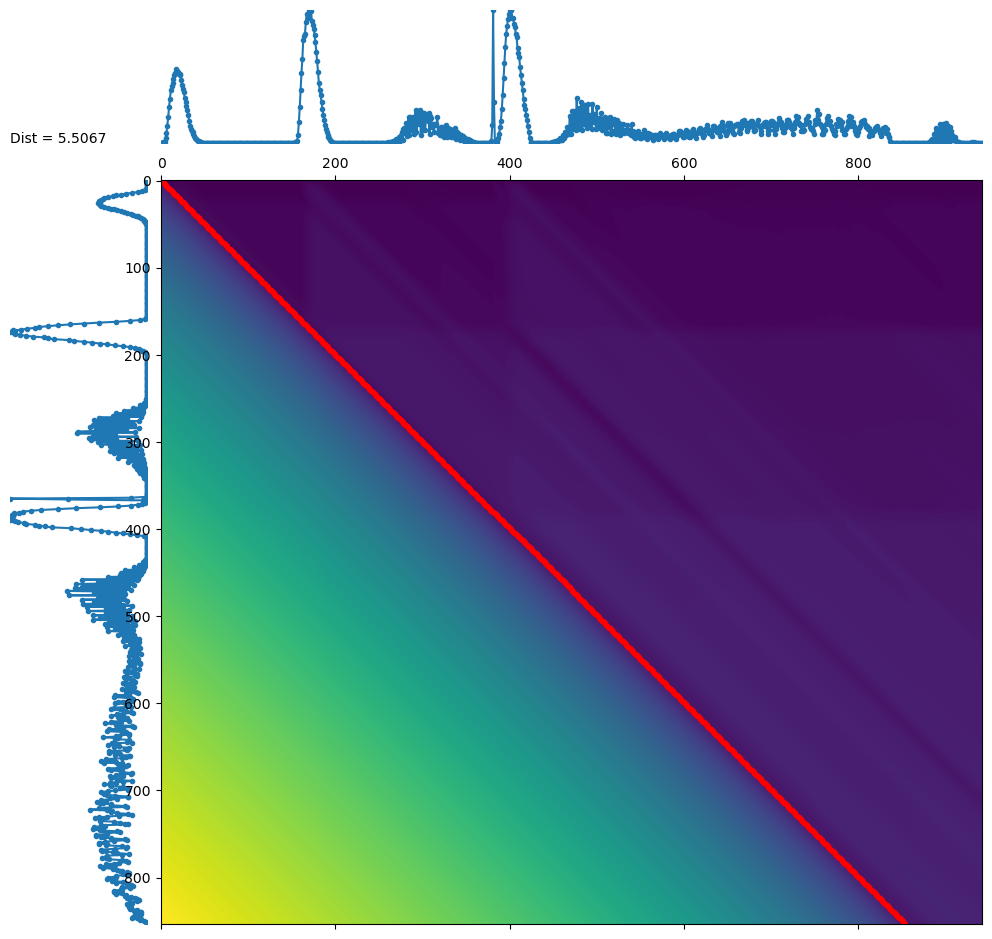

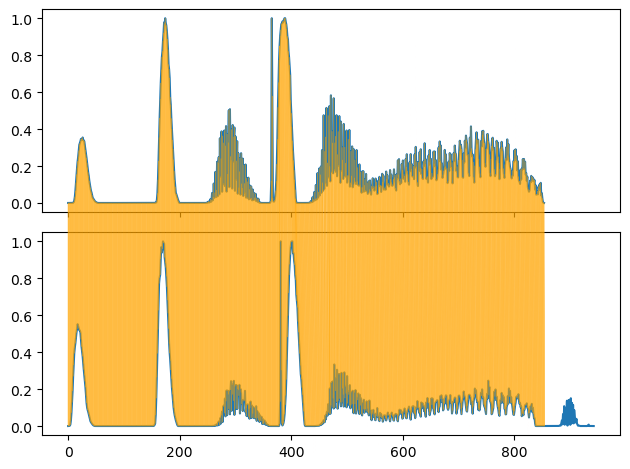

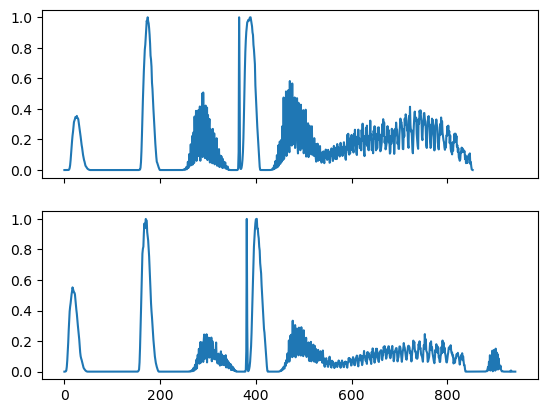

In [ ]:
from dtaidistance import dtw_visualisation
# dtw_visualisation.plot_warp(activites[0], activites[1], new_s, path)

from dtaidistance.subsequence.dtw import subsequence_alignment
from dtaidistance import dtw_visualisation as dtwvis

i, j = 3, 4
s0 = activites[i]
s1 = activites[j]
query = s0
series = s1


sa = subsequence_alignment(query, series, use_c=True, penalty=3)
match = sa.best_match()
startidx, endidx = match.segment
dtwvis.plot_warpingpaths(query, series, sa.warping_paths(), match.path)

dtwvis.plot_warping(s0, s1, match.path)

f, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(s0)
ax[1].plot(s1)

In [ ]:
match.distance

4.16593602470371

In [ ]:
from dtaidistance.subsequence.subsequencealignment import subsequence_alignment

n_songs = len(compiled_act)
dtw_dist = np.zeros((n_songs, n_songs))

for i in range(n_songs):
    if (i % 20 == 0):
        print(f"aligning {i}/{n_songs} song...")
    for j in range(i+1, n_songs):
        s1, s2 = compiled_act[i], compiled_act[j]
        if (len(s1) < len(s2)):
            q, s = s1, s2
        else:
            q, s = s2, s1
        bm = subsequence_alignment(q, s, penalty=3, use_c=True).best_match()
        dtw_dist[i, j] = bm.distance
        dtw_dist[j, i] = bm.distance


# (s1, s2, use_c=True, penalty=3).best_match()
#         bm2 = subsequence_alignment(s2, s1, use_c=True, penalty=3).best_match()
#         min_d = min(bm1.distance, bm2.distance)
#         dtw_dist[i, j] = min_d
#         dtw_dist[j, i] = min_d


aligning 0/592 song...
aligning 20/592 song...
aligning 40/592 song...
aligning 60/592 song...
aligning 80/592 song...
aligning 100/592 song...
aligning 120/592 song...
aligning 140/592 song...
aligning 160/592 song...
aligning 180/592 song...
aligning 200/592 song...
aligning 220/592 song...
aligning 240/592 song...
aligning 260/592 song...
aligning 280/592 song...
aligning 300/592 song...
aligning 320/592 song...
aligning 340/592 song...
aligning 360/592 song...
aligning 380/592 song...
aligning 400/592 song...
aligning 420/592 song...
aligning 440/592 song...
aligning 460/592 song...
aligning 480/592 song...
aligning 500/592 song...
aligning 520/592 song...
aligning 540/592 song...
aligning 560/592 song...
aligning 580/592 song...


In [ ]:
n_songs * 4 / 60

39.46666666666667

In [ ]:
i, j

(210, 352)

In [ ]:
from dtaidistance import dtw

compiled_act = []
for f in features_vecs:
    act = np.sum(f, axis=0)
    compiled_act.append(normalize(act))

dtw_dist_mat = dtw.distance_matrix_fast(compiled_act)

In [ ]:
# applying dynamic time warping to get distance for the songs
np.save(f"sdtw_dist_mat_{YEAR}", dtw_dist)

In [ ]:
from sklearn import manifold

seed = np.random.RandomState(seed=0)
mds = manifold.MDS(
    n_components=2,
    max_iter=3000,
    eps=1e-9,
    random_state=seed,
    dissimilarity="precomputed",
    n_jobs=1,
)
pos = mds.fit(dtw_dist).embedding_

nmds = manifold.MDS(
    n_components=2,
    metric=False,
    max_iter=3000,
    eps=1e-12,
    dissimilarity="precomputed",
    random_state=seed,
    n_jobs=1,
    n_init=1,
)
npos = nmds.fit_transform(dtw_dist, init=pos)

In [ ]:
df = pd.DataFrame(labels, columns=["ind", "songtype", "year", "month", "date", "filename"])

songtypes = df["songtype"].to_numpy()
songtype_c, songtype_v = [], []

for s in songtypes:
    songtype_c.append(s[:-1])
    songtype_v.append(s[-1])
    

df["npos_x"] = npos[:, 0]
df["npos_y"] = npos[:, 1]
df["songtype_c"] = songtype_c
df["songtype_v"] = songtype_v

In [ ]:
df["pos_x"] = pos[:, 0] 
df["pos_y"] = pos[:, 1]

In [ ]:
set(df["ind"])

{'bbom',
 'bdmo',
 'dmro',
 'mbrb',
 'mowr',
 'mpop',
 'mrpy',
 'mrrr',
 'mwpr',
 'owym',
 'rrpm'}

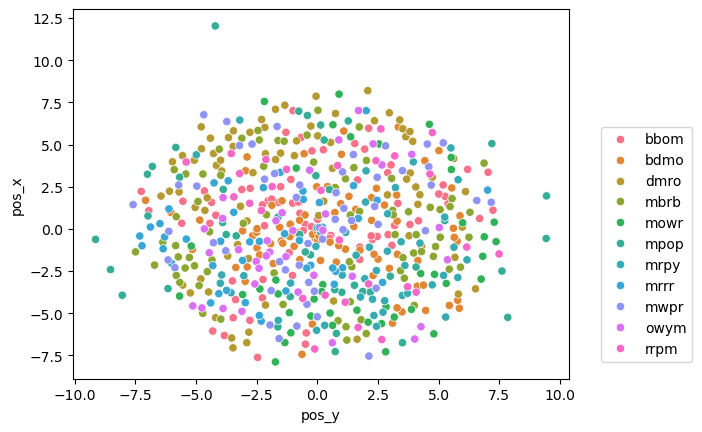

In [ ]:
sns.scatterplot(data=df, x="pos_y", y="pos_x", hue="ind")
plt.legend(bbox_to_anchor=(1.05, 0.7))

<Axes: xlabel='npos_y', ylabel='npos_x'>

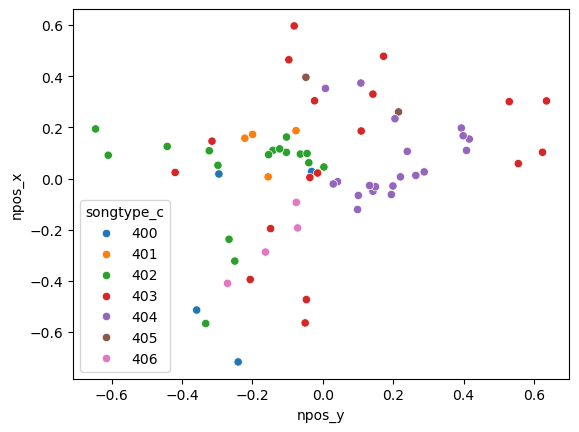

In [ ]:
import seaborn as sns

df_ind = df[(df["ind"] == "bbom")]
df_ind2 = df[(df["ind"] == "bbom") | (df["ind"] == "mowr")]
sns.scatterplot(data=df_ind, x="npos_y", y="npos_x", hue="songtype_c")

In [ ]:
df_ind[df_ind["songtype_c"]=="481"]

,ind,songtype,year,month,date,filename,npos_x,npos_y,songtype_c,songtype_v
549,owym,481a,2015,4,20,owym_20150420_0955_001_MA_481a.wav,-0.148220,-0.192922,481,a
550,owym,481b,2015,4,20,owym_20150420_1021_004_MA_481b.wav,0.095669,-0.497402,481,b
551,owym,481c,2015,4,20,owym_20150420_1021_004_MA_481c.wav,-0.369935,-0.213420,481,c
560,owym,481d,2015,4,29,owym_20150429_1008_001_MA_481d.wav,-0.450219,-0.008298,481,d
562,owym,481e,2015,5,1,owym_20150501_0934_009_MA_481e.wav,0.114498,-0.208635,481,e


In [ ]:
df_ind[df_ind["songtype_c"]=="477"]["filename"].to_numpy()

array(['owym_20150326_1059_011_MA_Gulls_477a.wav',
       'owym_20150326_1059_011_MA_Gulls_477b.wav',
       'owym_20150326_1059_011_MA_Gulls_477c.wav',
       'owym_20150326_1143_016_MA_477d.wav',
       'owym_20150501_1006_031_MA_Backgroundnoise_477e.wav'], dtype=object)

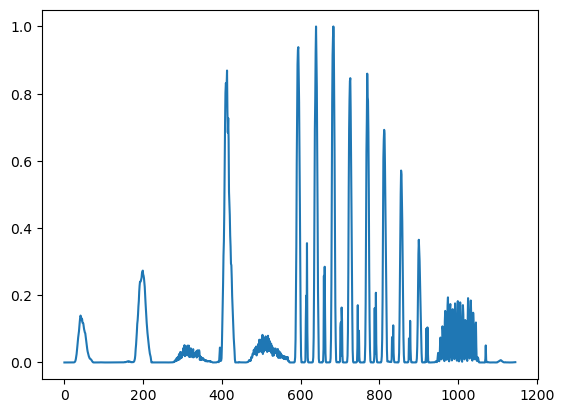

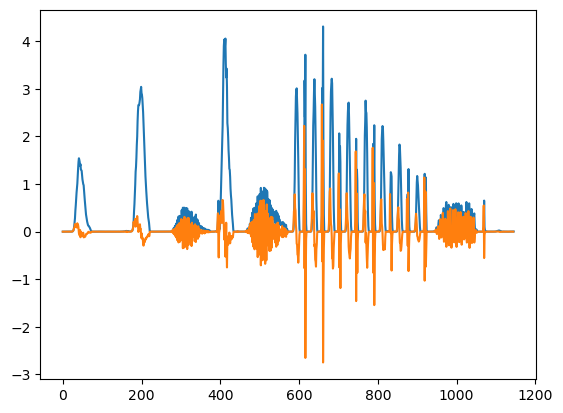

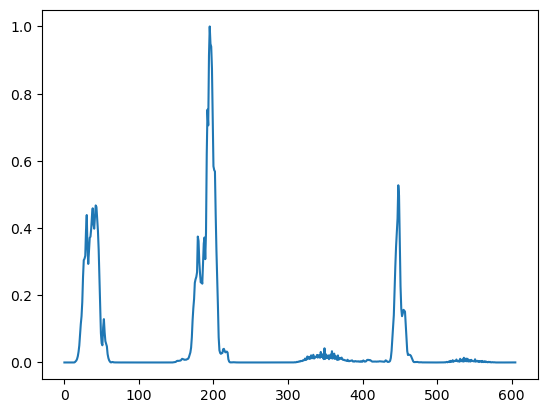

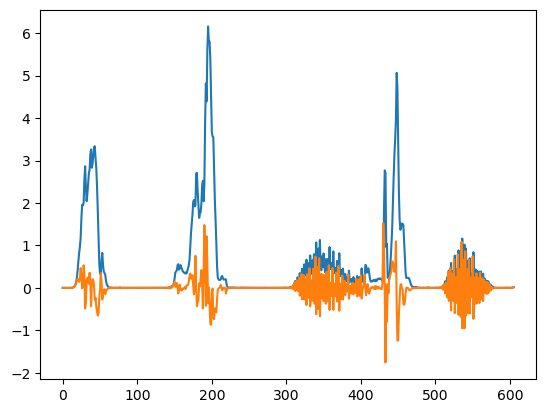

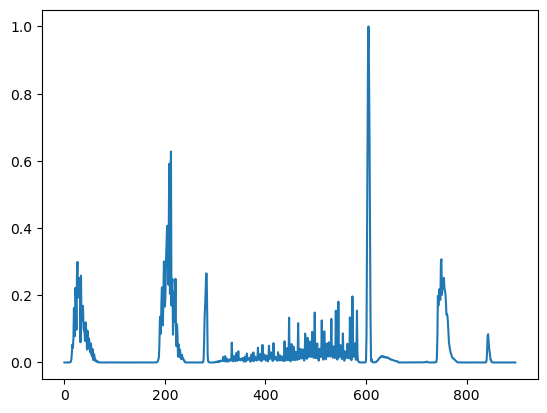

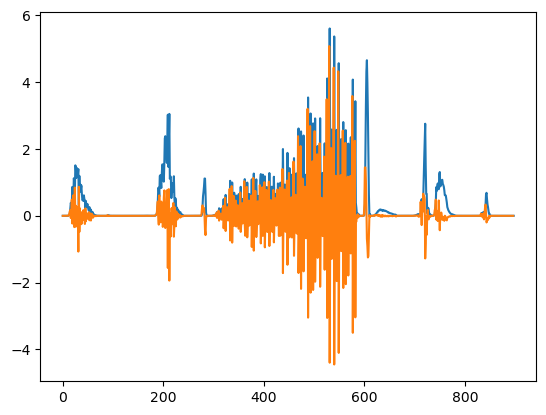

In [ ]:
# plt.plot(compiled_act[590])
for i in [529, 563, 551]:
    norm_compile = []
    for j in range(len(features_vecs[i])):
        # plt.plot(normalize(features_vecs[i][j]))
        norm_compile.append(normalize(features_vecs[i][j]))
    plt.figure()
    plt.plot(compiled_act[i])
    plt.figure()
    plt.plot(np.sum(norm_compile, axis=0))
    plt.plot(np.diff(np.sum(norm_compile, axis=0)))

In [ ]:
7000 / 22100 * 61

19.32126696832579